In [1]:
from sklearn import datasets as skdata
from pandas import DataFrame
import numpy as np

In [2]:
data=skdata.load_iris(as_frame=True,return_X_y=True)
X=DataFrame(data[0])
y=DataFrame(data[1])
name_map=dict(zip([0,1,2],['setosa', 'versicolor', 'virginica']))

y.target=y.target.map(lambda x:name_map[x])

In [3]:
y=y[(y=="setosa")|(y=="versicolor")]
named_y=y.copy()
named_y.dropna(inplace=True)
y.dropna(inplace=True)
X=X.loc[y.index]

y=y.map(lambda x: 1 if x=="setosa" else 0)

In [4]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from seaborn import scatterplot

example_X=X.loc[:,X.columns[:2]]
example_y=example_X.values@np.array([1,1]).T

In [5]:
setosa_idx=y[y.values==1].index
versicolor_idx=y[y.values!=1].index

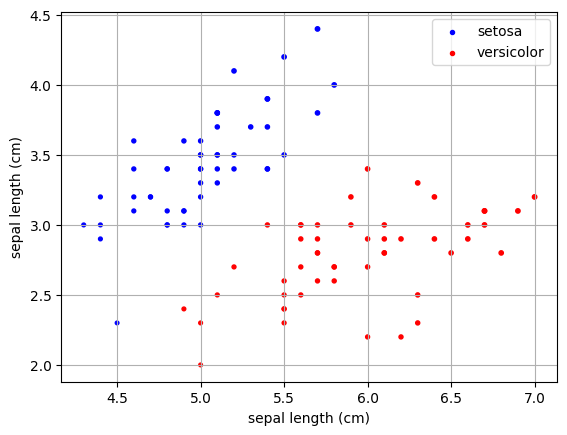

In [19]:
plt.scatter(example_X.loc[setosa_idx,"sepal length (cm)"]
           ,example_X.loc[setosa_idx,"sepal width (cm)"]
           ,example_y[setosa_idx],label="setosa",color="blue")
plt.scatter(example_X.loc[versicolor_idx,"sepal length (cm)"]
           ,example_X.loc[versicolor_idx,"sepal width (cm)"]
           ,example_y[versicolor_idx],label="versicolor",color="red")
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal length (cm)")
plt.grid()
plt.legend()

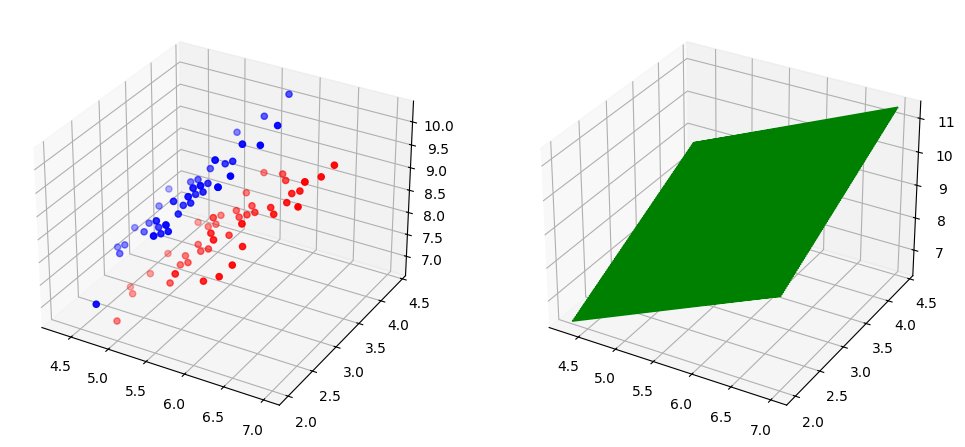

In [7]:
setosa_idx=y[y.values==1].index
versicolor_idx=y[y.values!=1].index

f=plt.figure(figsize=(12,6))
ax1=f.add_subplot(121,projection="3d")
ax1.scatter(example_X.loc[setosa_idx,"sepal length (cm)"]
           ,example_X.loc[setosa_idx,"sepal width (cm)"]
           ,example_y[setosa_idx],label="setosa",color="blue")
ax1.scatter(example_X.loc[versicolor_idx,"sepal length (cm)"]
           ,example_X.loc[versicolor_idx,"sepal width (cm)"]
           ,example_y[versicolor_idx],label="versicolor",color="red")

ax2=f.add_subplot(122,projection="3d")

x_range=np.linspace(example_X.values[:,0].min(),example_X.values[:,0].max(),100)
y_range=np.linspace(example_X.values[:,1].min(),example_X.values[:,1].max(),100)
x_range, y_range = np.meshgrid(x_range, y_range)
z_range=x_range+y_range

ax2.plot(x_range,y_range,z_range,color="green")
plt.show()

In [163]:
x_range=np.linspace(example_X.values[:,0].min(),example_X.values[:,0].max(),100)
y_range=np.linspace(example_X.values[:,1].min(),example_X.values[:,1].max(),100)
# x_range, y_range = np.meshgrid(x_range, y_range)
# z_range=x_range+y_range

---

In [319]:
from sklearn import discriminant_analysis as dis
LDA=dis.LinearDiscriminantAnalysis(solver="svd",n_components=1)
LDA.fit(example_X,named_y.values.ravel())

LinearDiscriminantAnalysis(n_components=1)

In [321]:
help(LDA)

Help on LinearDiscriminantAnalysis in module sklearn.discriminant_analysis object:

class LinearDiscriminantAnalysis(sklearn.base.ClassNamePrefixFeaturesOutMixin, sklearn.linear_model._base.LinearClassifierMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  LinearDiscriminantAnalysis(solver='svd', shrinkage=None, priors=None, n_components=None, store_covariance=False, tol=0.0001, covariance_estimator=None)
 |  
 |  Linear Discriminant Analysis.
 |  
 |  A classifier with a linear decision boundary, generated by fitting class
 |  conditional densities to the data and using Bayes' rule.
 |  
 |  The model fits a Gaussian density to each class, assuming that all classes
 |  share the same covariance matrix.
 |  
 |  The fitted model can also be used to reduce the dimensionality of the input
 |  by projecting it to the most discriminative directions, using the
 |  `transform` method.
 |  
 |  .. versionadded:: 0.17
 |  
 |  For a comparison between
 |  :class:`~sklearn.di

In [320]:
w=LDA.coef_
b=LDA.intercept_
print("w :",w)
print("b :",b)

w : [[ 11.43635631 -14.14302795]]
b : [-18.73906174]


In [324]:
idx1=named_y[named_y=="setosa"].dropna().index
idx2=named_y[named_y=="versicolor"].dropna().index
col_name=example_X.columns

In [330]:
def calculate(X):
    return X@LDA.coef_.T+LDA.intercept_

In [372]:
point1=calculate(example_X.loc[idx1,col_name].mean())
point2=calculate(example_X.loc[idx2,col_name].mean())

class1=calculate(example_X.loc[idx1,col_name])
class2=calculate(example_X.loc[idx2,col_name])

In [340]:
x_range=np.linspace(-20,20,500)

In [367]:
plt.rcParams["font.family"]="AppleGothic"
plt.rcParams["axes.unicode_minus"]=False

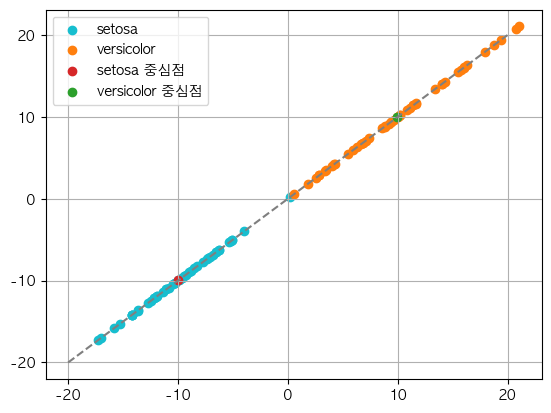

In [373]:
x_range=np.linspace(-20,20,500)

plt.plot(x_range,x_range,linestyle="--",color="C7")
plt.scatter(class1,class1,color="C9",label="setosa")
plt.scatter(class2,class2,color="C1",label="versicolor")
plt.scatter(point1,point1,color="C3",marker="o",label="setosa 중심점")
plt.scatter(point2,point2,color="C2",marker="o",label="versicolor 중심점")
plt.legend()
plt.grid()